<a href="https://colab.research.google.com/github/jittakorn-ch/multivariate/blob/main/Chapter_4_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Example on Iris dataset

In [ ]:
import pandas as pd

In [ ]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## PCA

In [ ]:
from sklearn.decomposition import  PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
new_pca = pca.fit_transform(example_df.iloc[:,:-1])

In [ ]:

from matplotlib import pyplot as plt

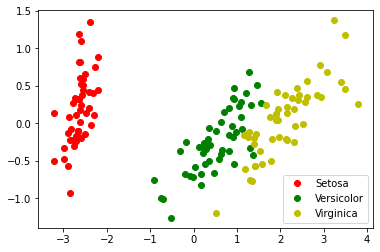

In [ ]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or',label='Setosa')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og',label='Versicolor')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy',label='Virginica')
plt.legend()

## MDS (Muktidimensional Scaling)

In [ ]:
X1 = example_df.iloc[0,:-1].to_numpy()
X1

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [ ]:
X2 = example_df.iloc[1,:-1].to_numpy()
X2

array([4.9, 3.0, 1.4, 0.2], dtype=object)

In [ ]:
import numpy as np

In [ ]:
dist = np.linalg.norm(X1-X2)
dist

0.5385164807134502

In [ ]:
from sklearn.marics import paiwise_

### ทำ MDS

In [ ]:
from sklearn.manifold import MDS

In [ ]:
mds = MDS(n_components=2)

In [ ]:
new_mds = mds.fit_transform(example_df.iloc[:,:-1])

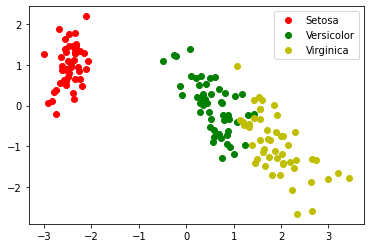

In [ ]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.legend()

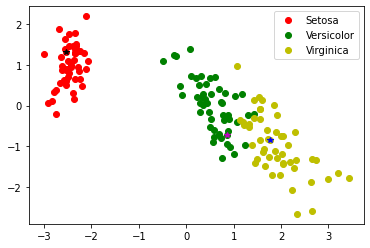

In [ ]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.plot(new_mds[6,0],new_mds[6,1],'*k')
plt.plot(new_mds[56,0],new_mds[56,1],'*m')
plt.plot(new_mds[116,0],new_mds[116,1],'*b')
plt.legend()

### การใช้ Pre-computed Distance Matrix

In [ ]:
mds2 = MDS(n_components=2,dissimilarity='precomputed')

## Example 2

https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

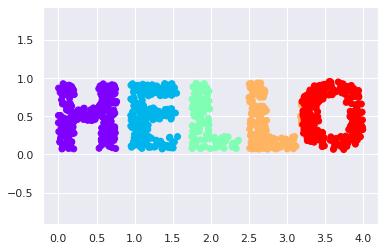

In [24]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

In [5]:
X = make_hello(1000)

(1000, 2)

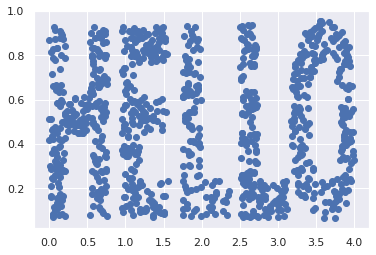

In [8]:
plt.scatter(X[:,0],X[:,1])

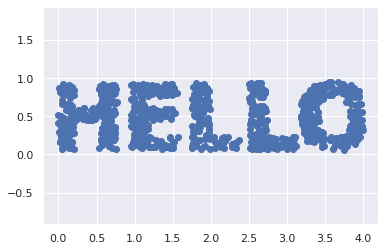

In [9]:
plt.scatter(X[:,0],X[:,1])
plt.axis('equal');              ### ทำให้สเกลแต่ล่ะขั้วเท่ากัน  ทำให้ดูสวยขึ้น

In [11]:
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))

In [12]:
colorize['c'].shape

(1000,)

In [13]:
colorize['cmap']

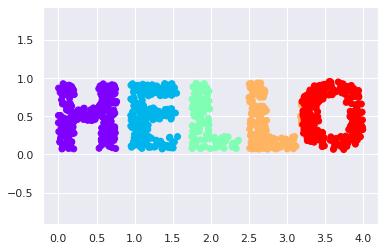

In [15]:
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

In [16]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

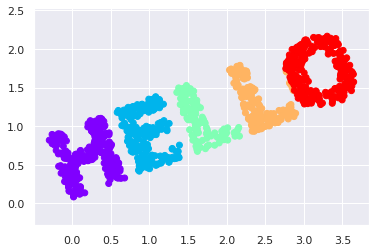

In [17]:
X2 = rotate(X, 20)
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

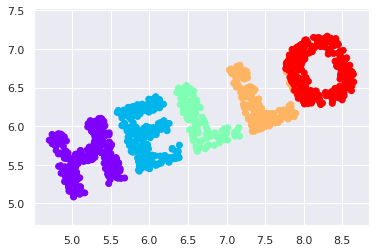

In [18]:
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

ขยับจุดเริ่ม แกรน X และ Y จาก (0,0) เป็น (5,5)

### MDS

In [19]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

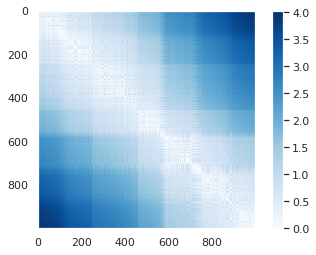

In [20]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

In [25]:
D2 = pairwise_distances(X2)

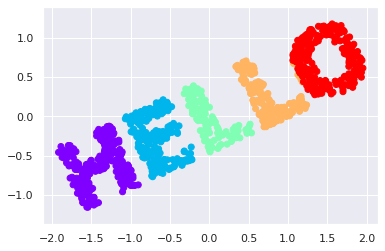

In [28]:
from sklearn.manifold import MDS

model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');



```
random_state=1   กำหนดจุดการหมุน ทำให้ข้อมูลเหมือนเดิมทุกครั้งที่ run
```



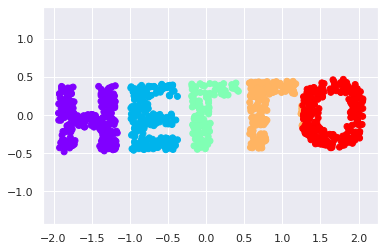

In [29]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed')
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

## Quiz4 ทดลองทำ PCA กับข้อมูล ```X``` แล้ว plotgragh และดูผลว่าการกระจายของข้อมุลเปลี่ยนไปหรือไม่



In [30]:
from sklearn.decomposition import  PCA

In [31]:
pca = PCA(n_components=2)

In [34]:
X_pca = pca.fit_transform(X)

In [39]:
X_pca

array([[-1.9337476 , -0.08154573],
       [-1.93360269,  0.01301875],
       [-1.93284845,  0.37256384],
       ...,
       [ 2.05704731, -0.03171414],
       [ 2.05815725, -0.1327384 ],
       [ 2.06207964, -0.15679672]])

In [33]:
from matplotlib import pyplot as plt

No handles with labels found to put in legend.


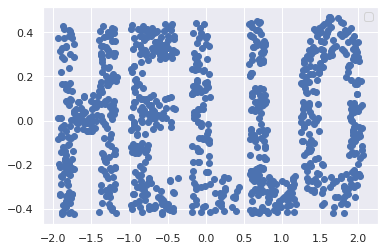

In [42]:
plt.plot(X_pca[:,0],X_pca[:,1],'ob')
plt.legend()

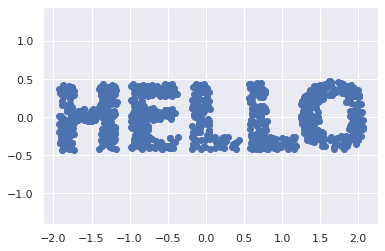

In [48]:
plt.plot(X_pca[:,0],X_pca[:,1],'ob')
plt.axis('equal');

ข้อมูลมีการกระจายในลักษณะเดิม

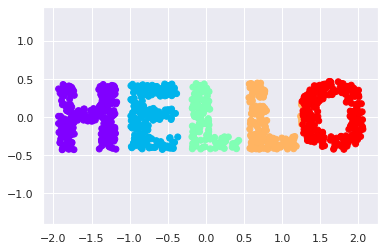

In [44]:
model = PCA(n_components=2)
out = model.fit_transform(X_pca)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');